# Comprehensive Guide to Exploratory Data Analysis (EDA)

In [53]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [33]:
sns.set_style("whitegrid")

In [34]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
    "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
    "hours-per-week", "native-country", "income"
]
df = pd.read_csv(url, header=None, names=column_names)

# Display the first few rows of the dataset
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 1. Splitting Data into Categorical and Numerical Columns

### What We Are Doing
In this step, we will split the dataset into two separate categories:
1. **Categorical Variables** – Variables that represent categories or discrete values (e.g., "workclass," "occupation").
2. **Numerical Variables** – Variables that are continuous or represent numbers (e.g., "age," "hours-per-week").

### Why We Are Doing This
Splitting the data into categorical and numerical variables is crucial because different EDA techniques apply to different data types:
- **Categorical Variables** often require frequency counts, proportions, or chi-square tests to explore relationships.
- **Numerical Variables** can be explored with measures of central tendency, dispersion, histograms, and correlation matrices.
- This distinction allows us to:
  - Apply appropriate transformations and visualisations.
  - Avoid errors in statistical tests or preprocessing steps.

In [35]:
# Splitting the columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(exclude=['object']).columns.tolist()

# Display the lists of columns
print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
Numerical Columns: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


## 2. Descriptive Statistics

### What We Are Doing
In this section, we will calculate and visualise the descriptive statistics for our dataset. For numerical variables, we will:
- Compute measures such as mean, median, standard deviation, minimum, and maximum.
- Create visualisations like histograms and boxplots to explore the data distribution.

For categorical variables, we will:
- Compute frequency counts and proportions.
- Use bar charts to visualise the distribution of categories.

### Why We Are Doing This
Descriptive statistics give us a quick understanding of our dataset:
- **Numerical Variables:** By assessing measures of central tendency and dispersion, we can identify potential outliers, skewness, and overall distribution shape.
- **Categorical Variables:** Frequency counts and bar charts help us grasp how data is distributed among different categories, which is essential for further analysis and model building.

The insights obtained at this stage will guide us in data cleaning, feature engineering, and more advanced analyses.


In [36]:
# Descriptive statistics for numerical variables
df[numerical_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [37]:
# Descriptive statistics for categorical variables
df[categorical_columns].describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


#### Histograms

##### What We Are Doing
We will create histograms for each numerical variable. Histograms help us visualise the frequency distribution and understand the overall shape (e.g., skewness, modality) of the data.

##### Why We Are Doing This
Histograms are essential because:
- They reveal the distribution pattern of data.
- They help detect any skewness or multimodality.
- They provide insight into the spread and density of the data values.

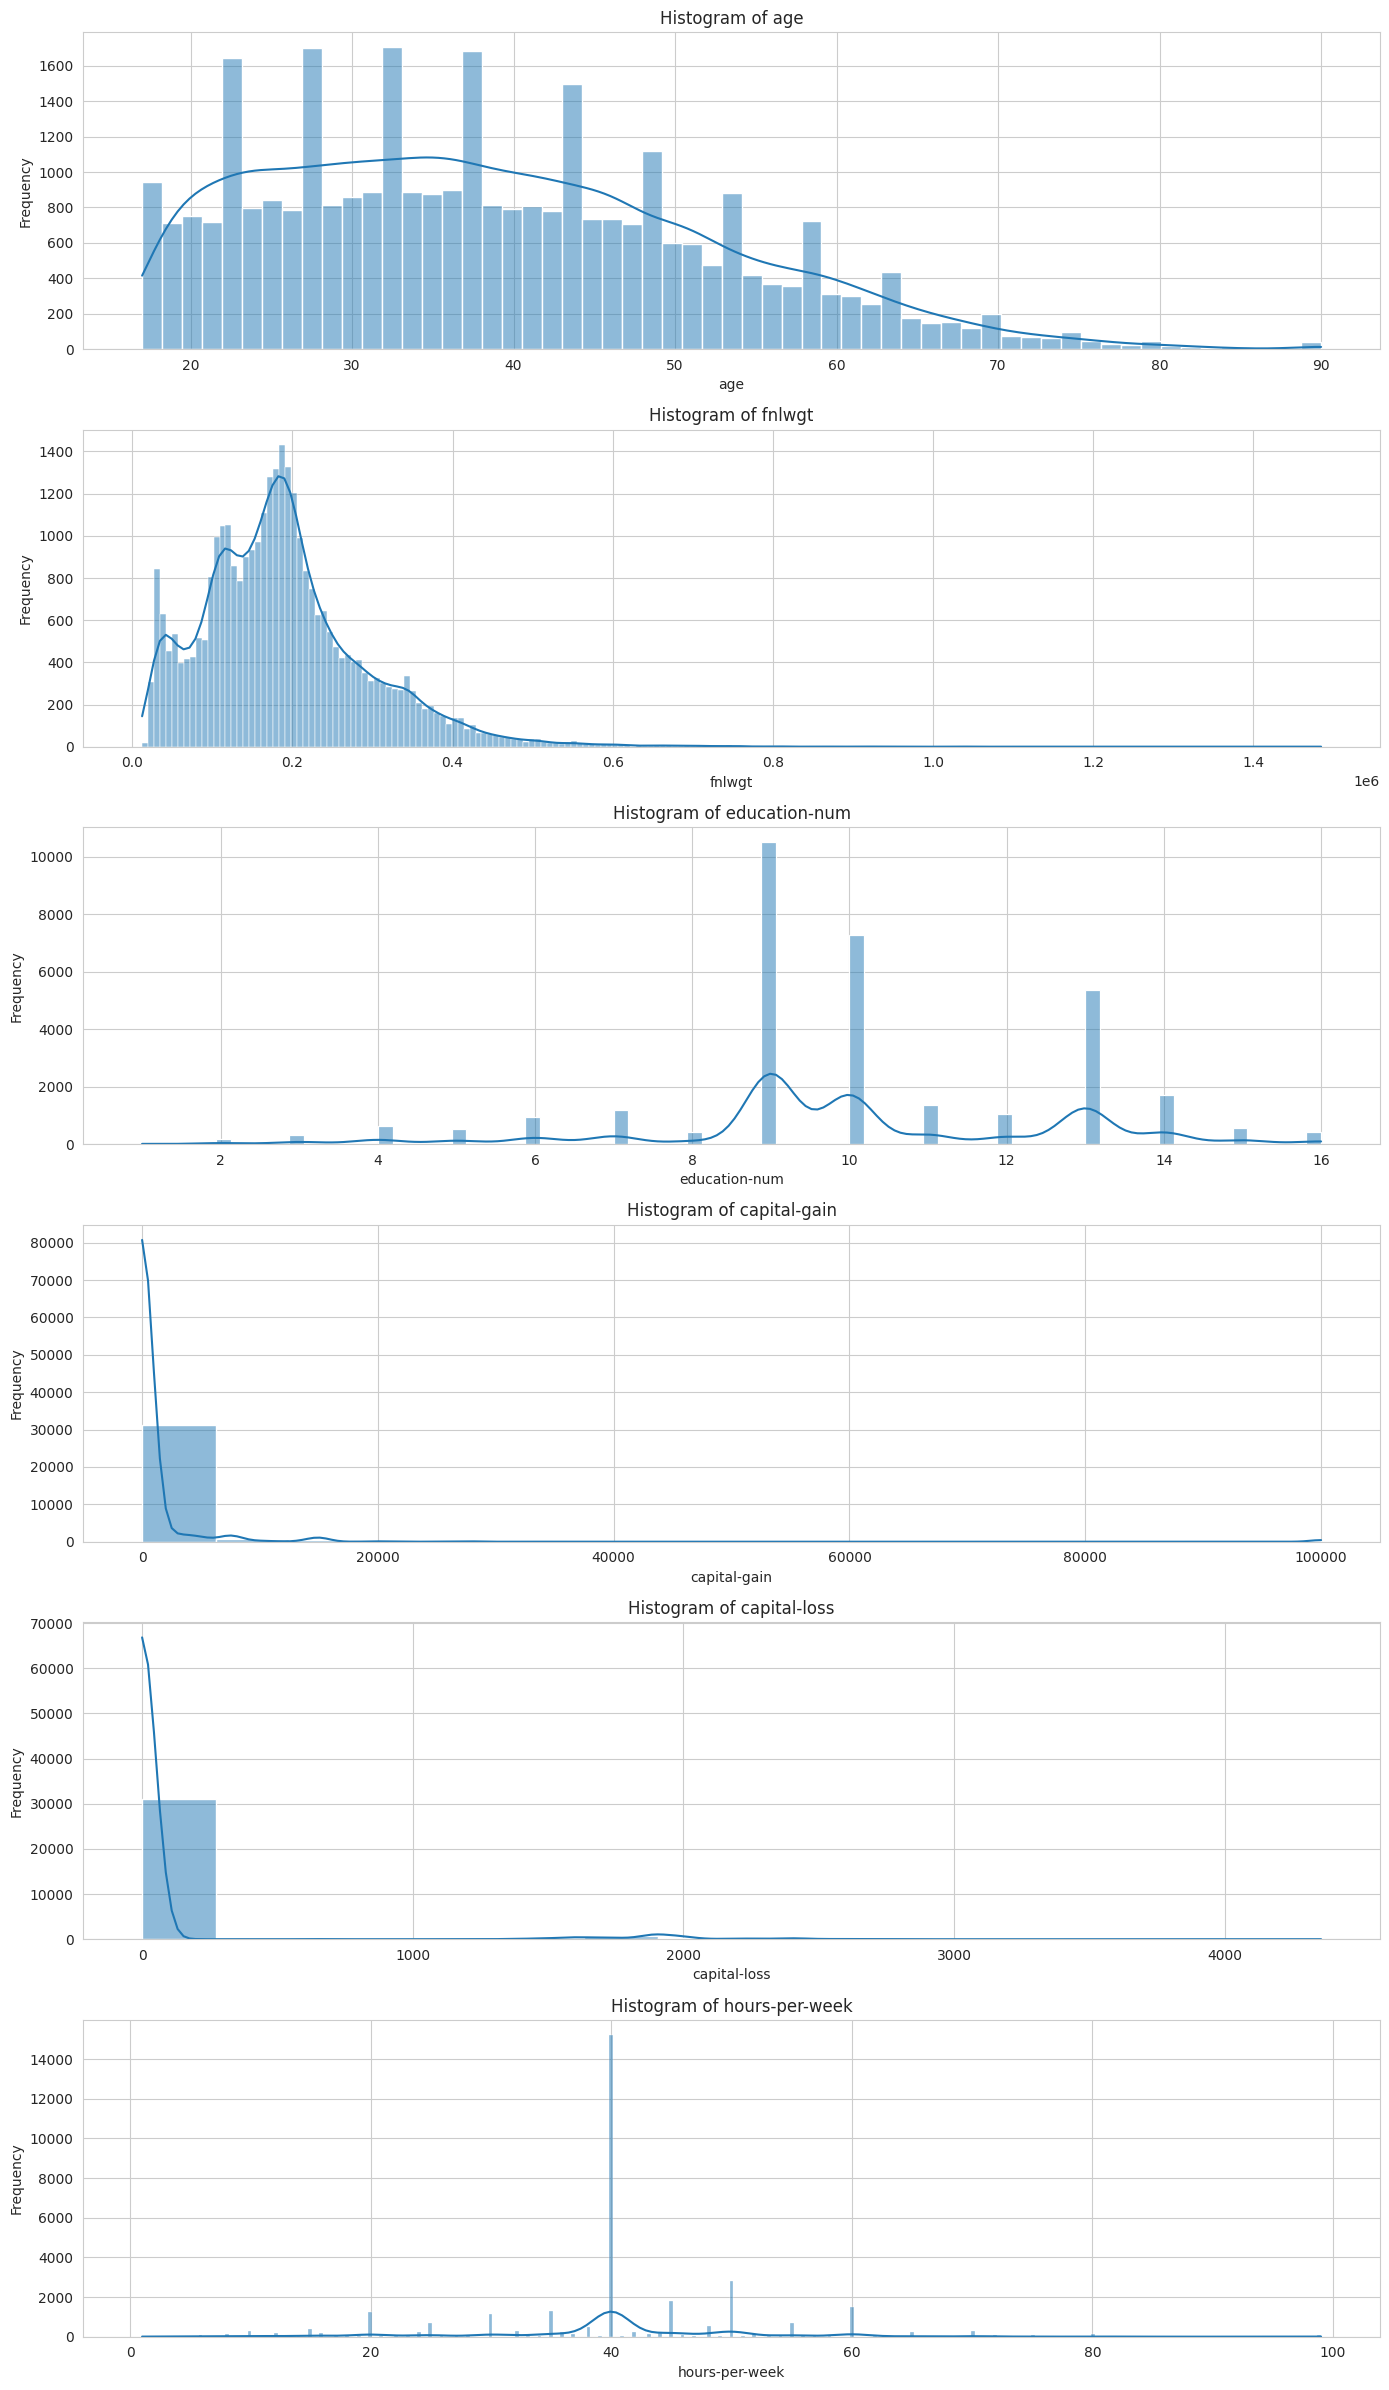

In [38]:
# Plot histograms for each numerical column
num_plots = len(numerical_columns)

plt.figure(figsize=(14, 4 * num_plots))
for idx, col in enumerate(numerical_columns):
    plt.subplot(num_plots, 1, idx + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

#### Boxplots

##### What We Are Doing
We will create boxplots for each numerical variable. Boxplots display the median, quartiles, and potential outliers, providing a clear view of the data's spread and variability.

##### Why We Are Doing This
Boxplots are essential because:
- They provide a visual summary of the distribution's central tendency and dispersion.
- They help identify potential outliers.
- They allow for quick comparison across different numerical variables.

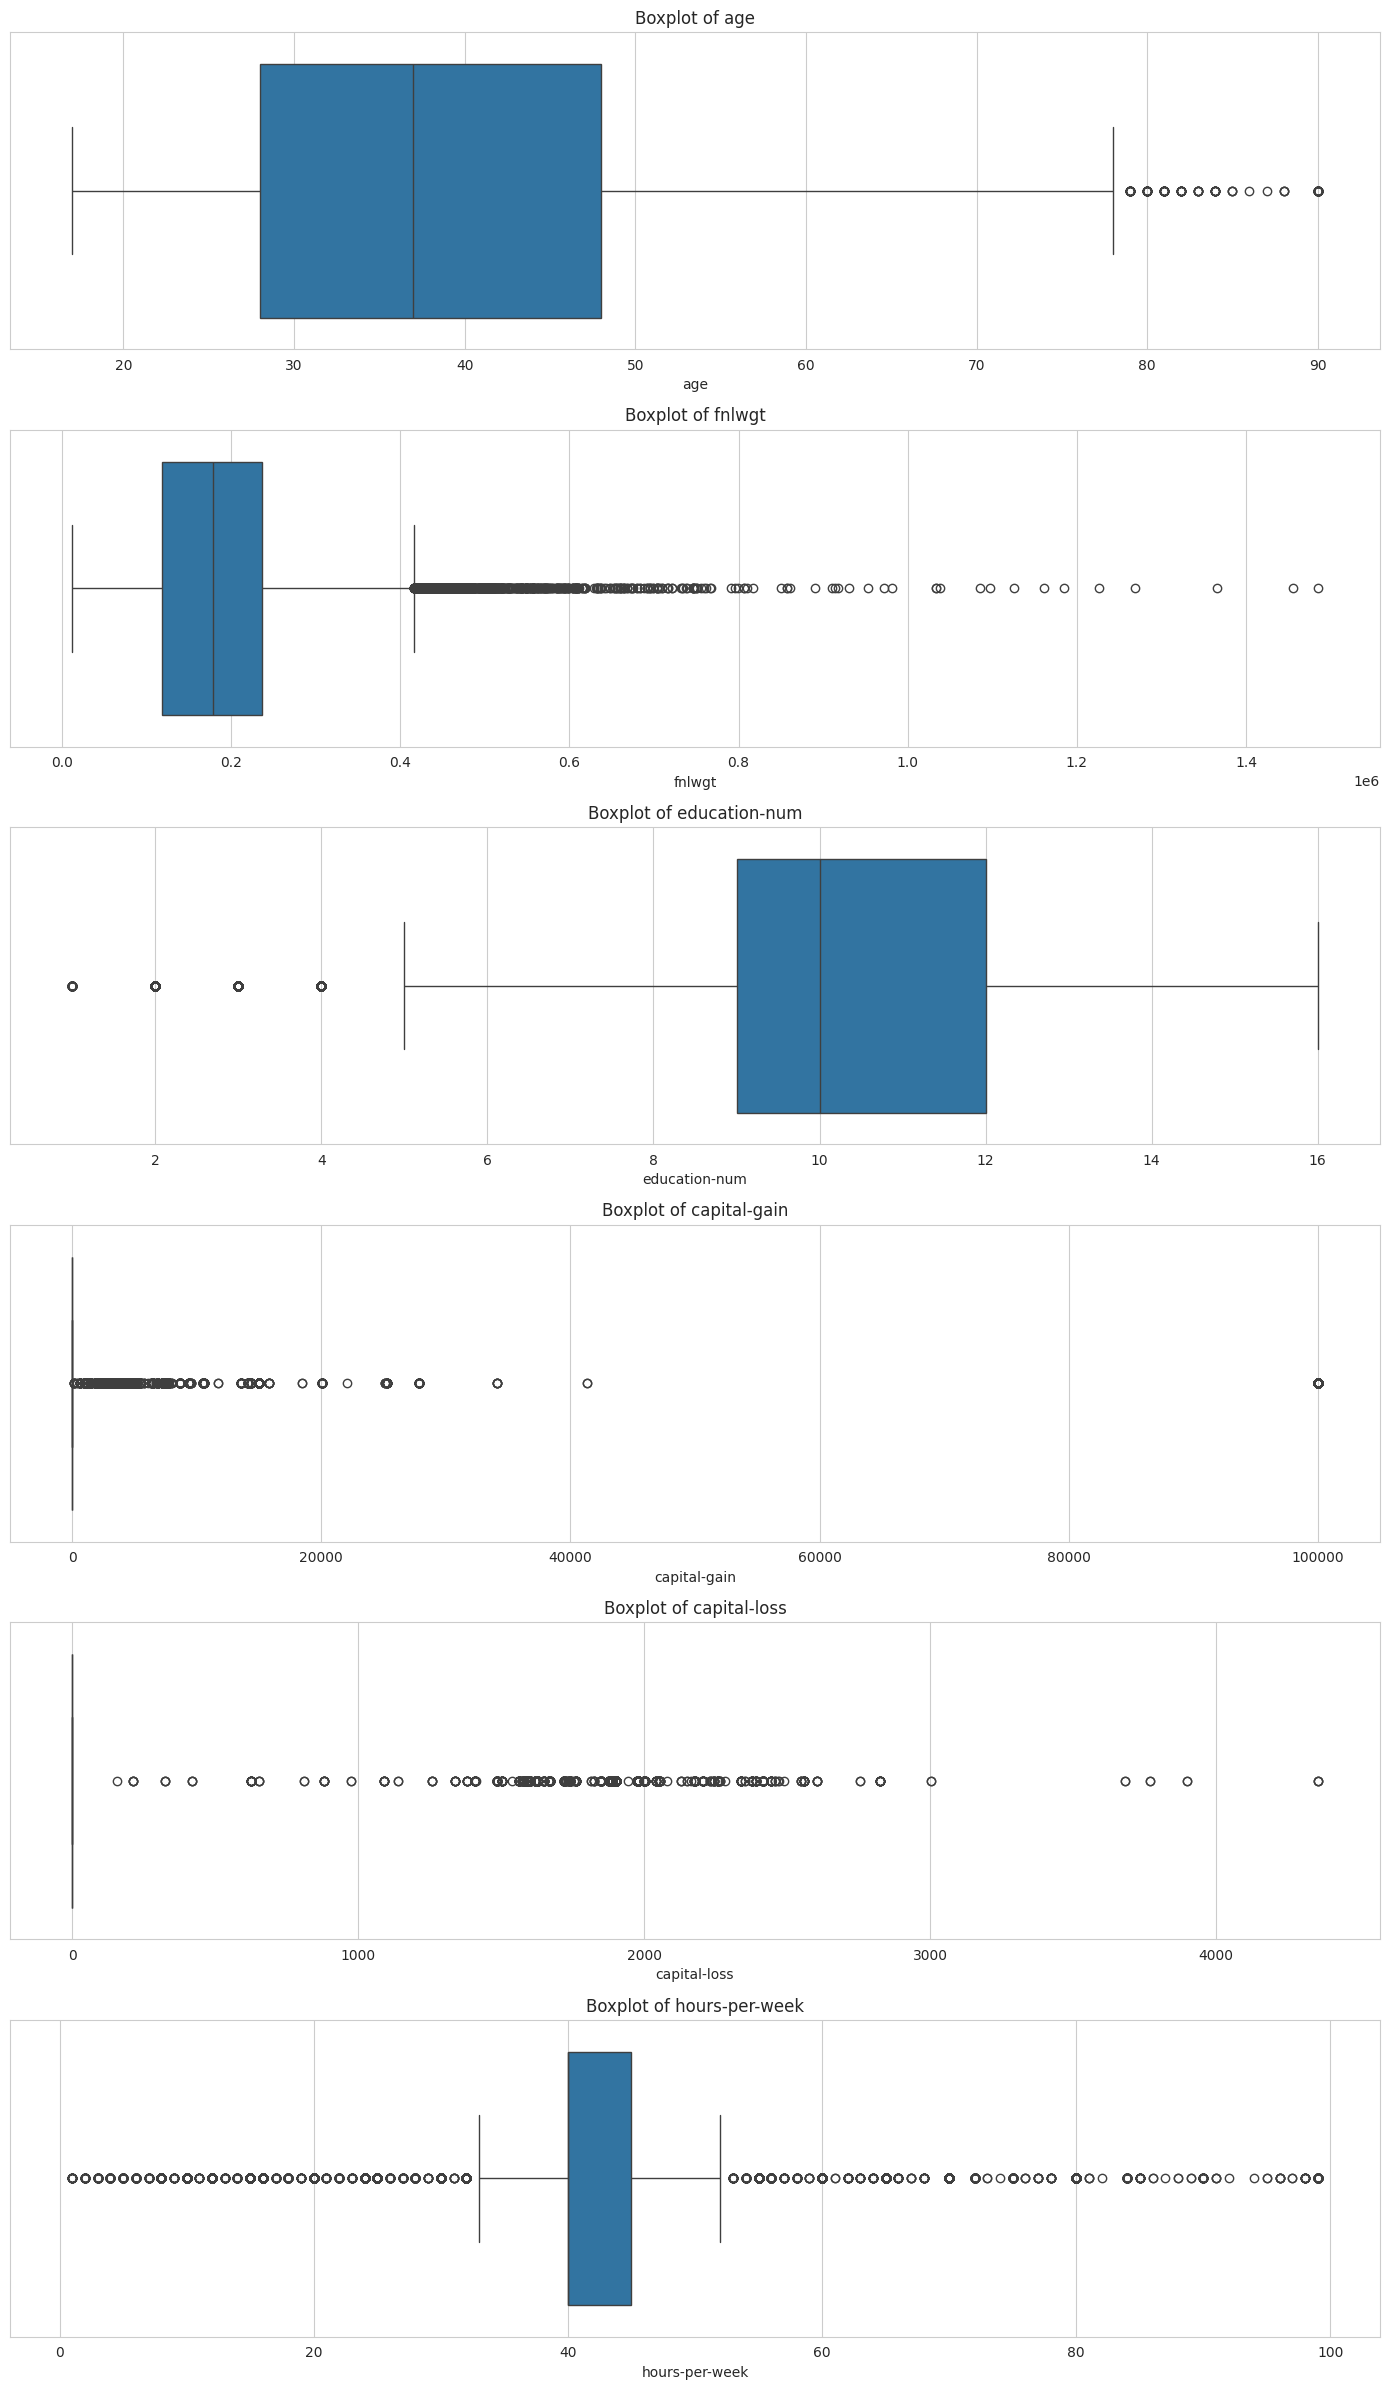

In [39]:
# Plot boxplots for each numerical column
plt.figure(figsize=(14, 4 * num_plots))
for idx, col in enumerate(numerical_columns):
    plt.subplot(num_plots, 1, idx + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### Frequency Counts for Categorical Variables

##### What We Are Doing
We will calculate the frequency counts for each categorical variable. This provides a tabular summary of how many times each category appears in the dataset.

##### Why We Are Doing This
Frequency counts are essential because:
- They help us understand the distribution of categories.
- They reveal any imbalance or rarity in the categorical data.
- They form the basis for further visualisations like bar charts.


In [40]:
# Print frequency counts for each categorical column
for col in categorical_columns:
    print(f"Frequency counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Frequency counts for workclass:
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


Frequency counts for education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64


Frequency counts for marital-status:
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name:

#### Bar Charts for Categorical Variables

##### What We Are Doing
We will create bar charts for each categorical variable to visualise the frequency distribution. Bar charts provide a quick visual insight into the data's categorical distribution.

##### Why We Are Doing This
Bar charts are important because:
- They make it easy to see which categories dominate.
- They allow for quick comparisons between different groups.
- They are useful for spotting data anomalies or imbalances in category frequencies.

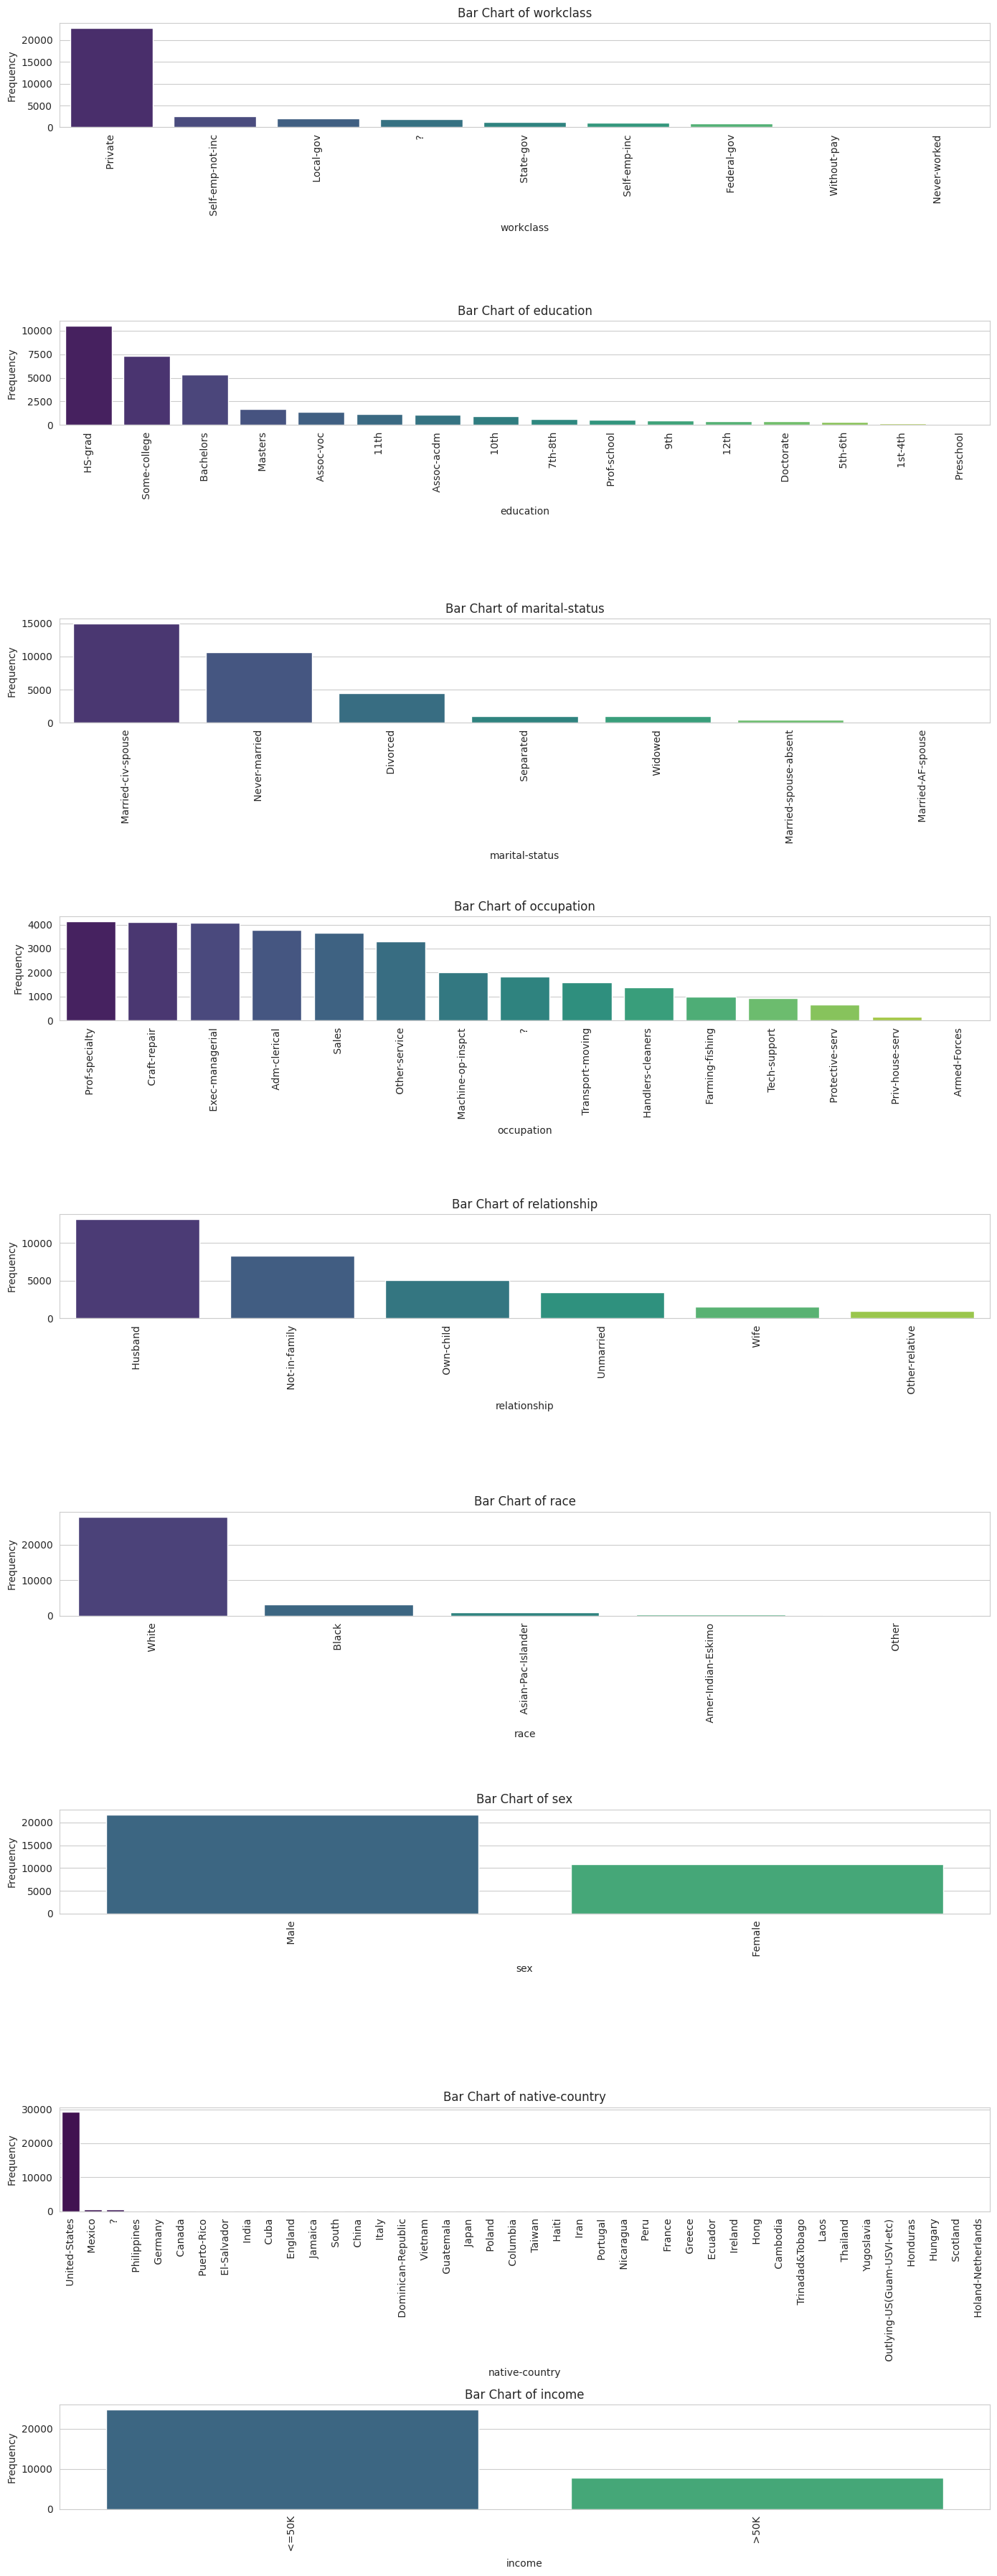

In [41]:
# Plot bar charts for each categorical column
num_cats = len(categorical_columns)
plt.figure(figsize=(14, 4 * num_cats))
for idx, col in enumerate(categorical_columns):
    plt.subplot(num_cats, 1, idx + 1)
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette='viridis')
    plt.title(f"Bar Chart of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 3. Bivariate Analysis

### What We Are Doing
In this section, we will explore the relationships between pairs of variables. Examples of visualisations we may use include:
- **Scatter plots** to visualise the relationship between two numerical variables.
- **Boxplots** to compare the distribution of a numerical variable across different categories.
- **Stacked bar charts** to examine how the distribution of one categorical variable differs across another.

### Why We Are Doing This
Bivariate analysis helps uncover relationships and patterns between two variables:
- **Numerical vs. Numerical:** Scatter plots help identify trends, clusters, and potential correlations between variables.
- **Numerical vs. Categorical:** Boxplots reveal differences in distribution across categories, highlighting variations or potential outliers.
- **Categorical vs. Categorical:** Stacked bar charts provide insights into how categories are distributed within another category, helping identify patterns or imbalances.

These visualisations provide a solid foundation for further statistical and predictive analyses.


#### Scatter Plots for Numerical Variables

##### What We Are Doing
We will create scatter plots to examine the relationship between pairs of numerical variables. This helps in visualizing potential trends, patterns, or linear associations between variables.

##### Why We Are Doing This
Scatter plots allow us to:
- Observe the direction and strength of relationships.
- Detect clusters, trends, or outliers in the data.
- Inform subsequent analyses, such as correlation or regression.


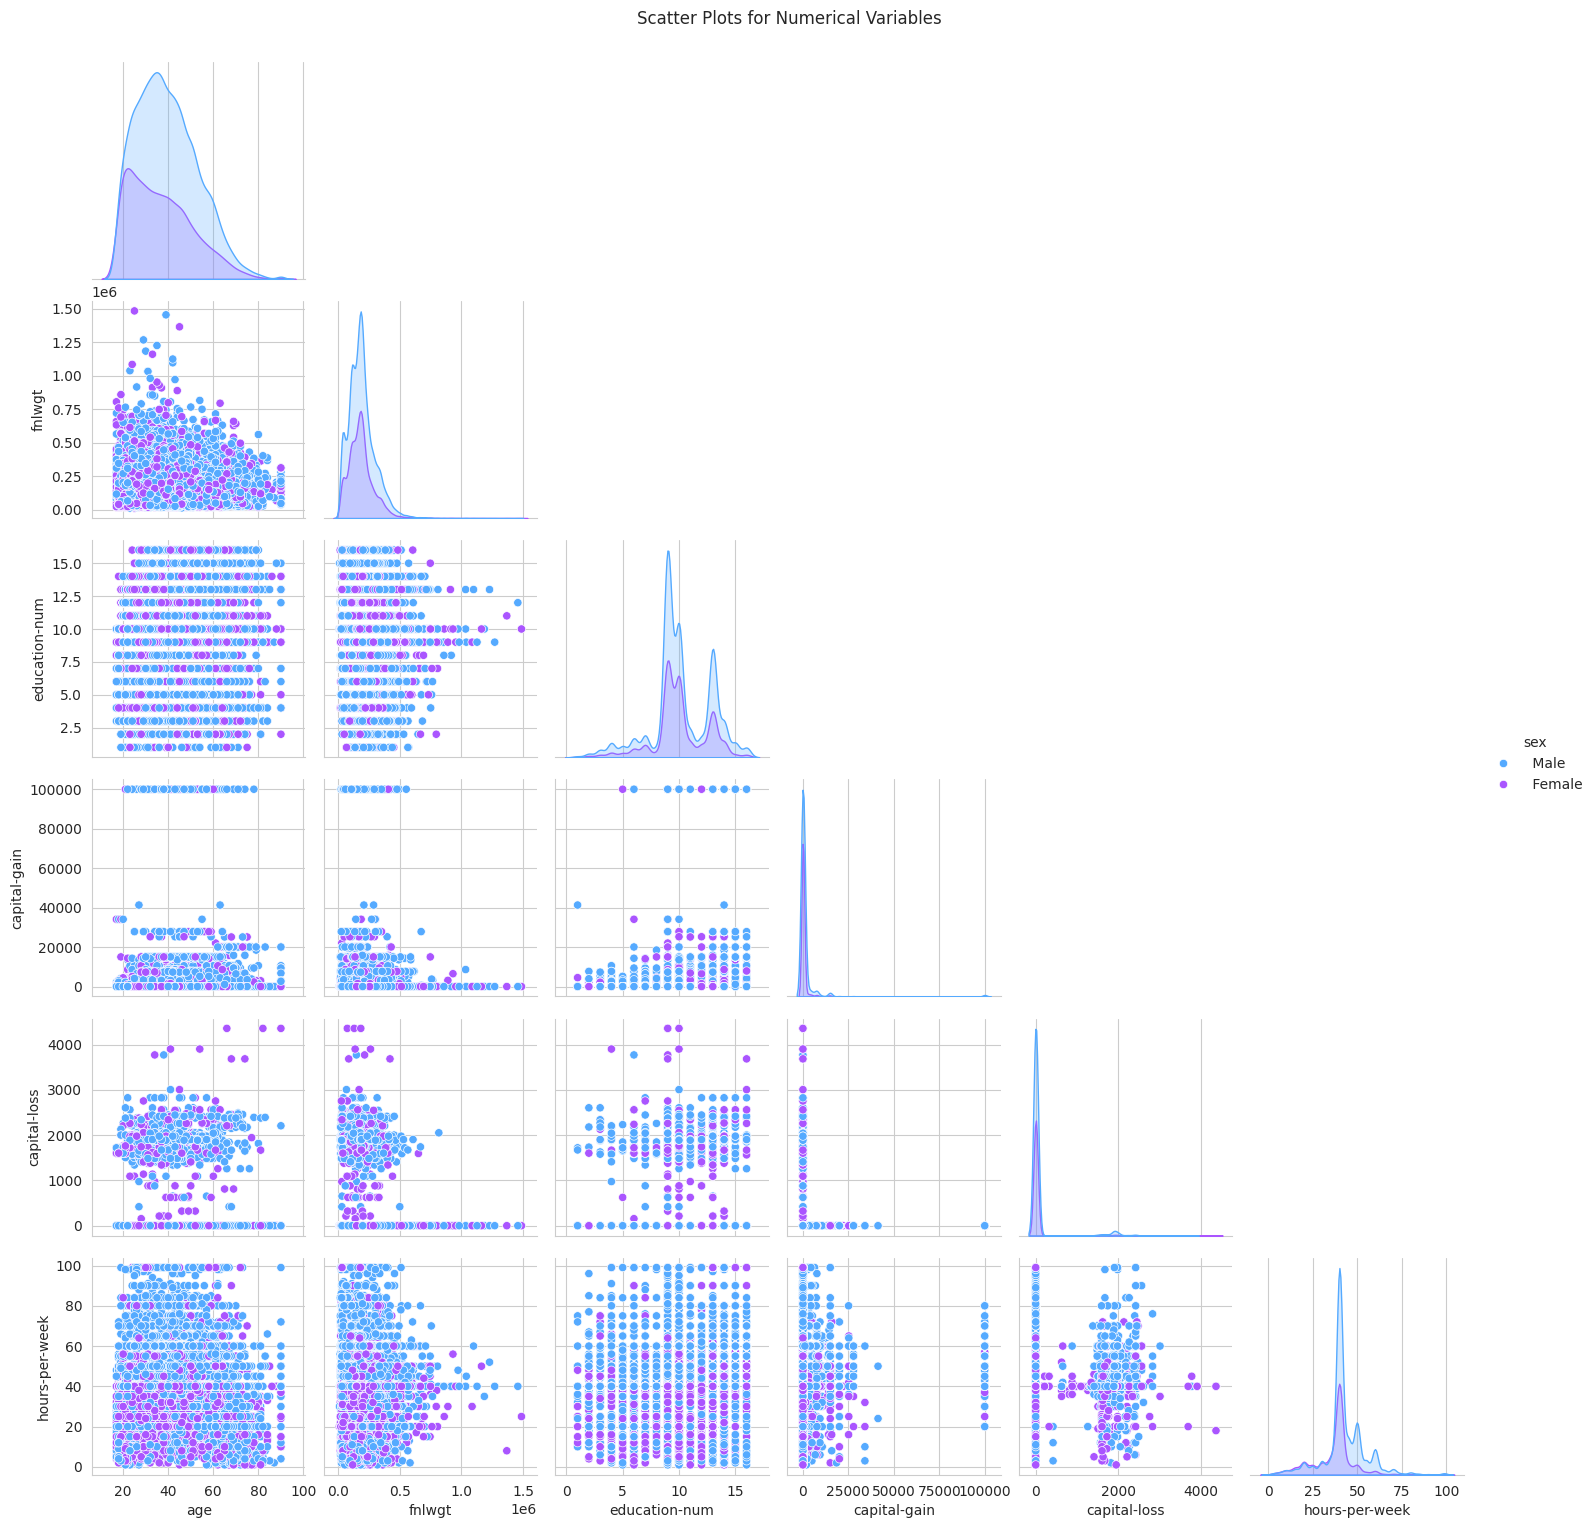

In [42]:
# Using Seaborn's pairplot to create scatter plots for all numerical variables
sns.pairplot(
    diag_kind='kde',
    hue="sex",
    palette="cool",
    corner=True,
    data=df,)
plt.suptitle("Scatter Plots for Numerical Variables", y=1.02)
plt.show()

#### Side-by-Side Boxplots

##### What We Are Doing
We will create boxplots to visualise the distribution of numerical variables across different categories. This enables us to compare the central tendency and variability for each group.

##### Why We Are Doing This
Side-by-side boxplots help to:
- Compare medians, quartiles, and spread of numerical data across categorical groups.
- Identify differences in distribution and detect outliers.
- Understand how a numerical variable is affected by categorical segmentation.

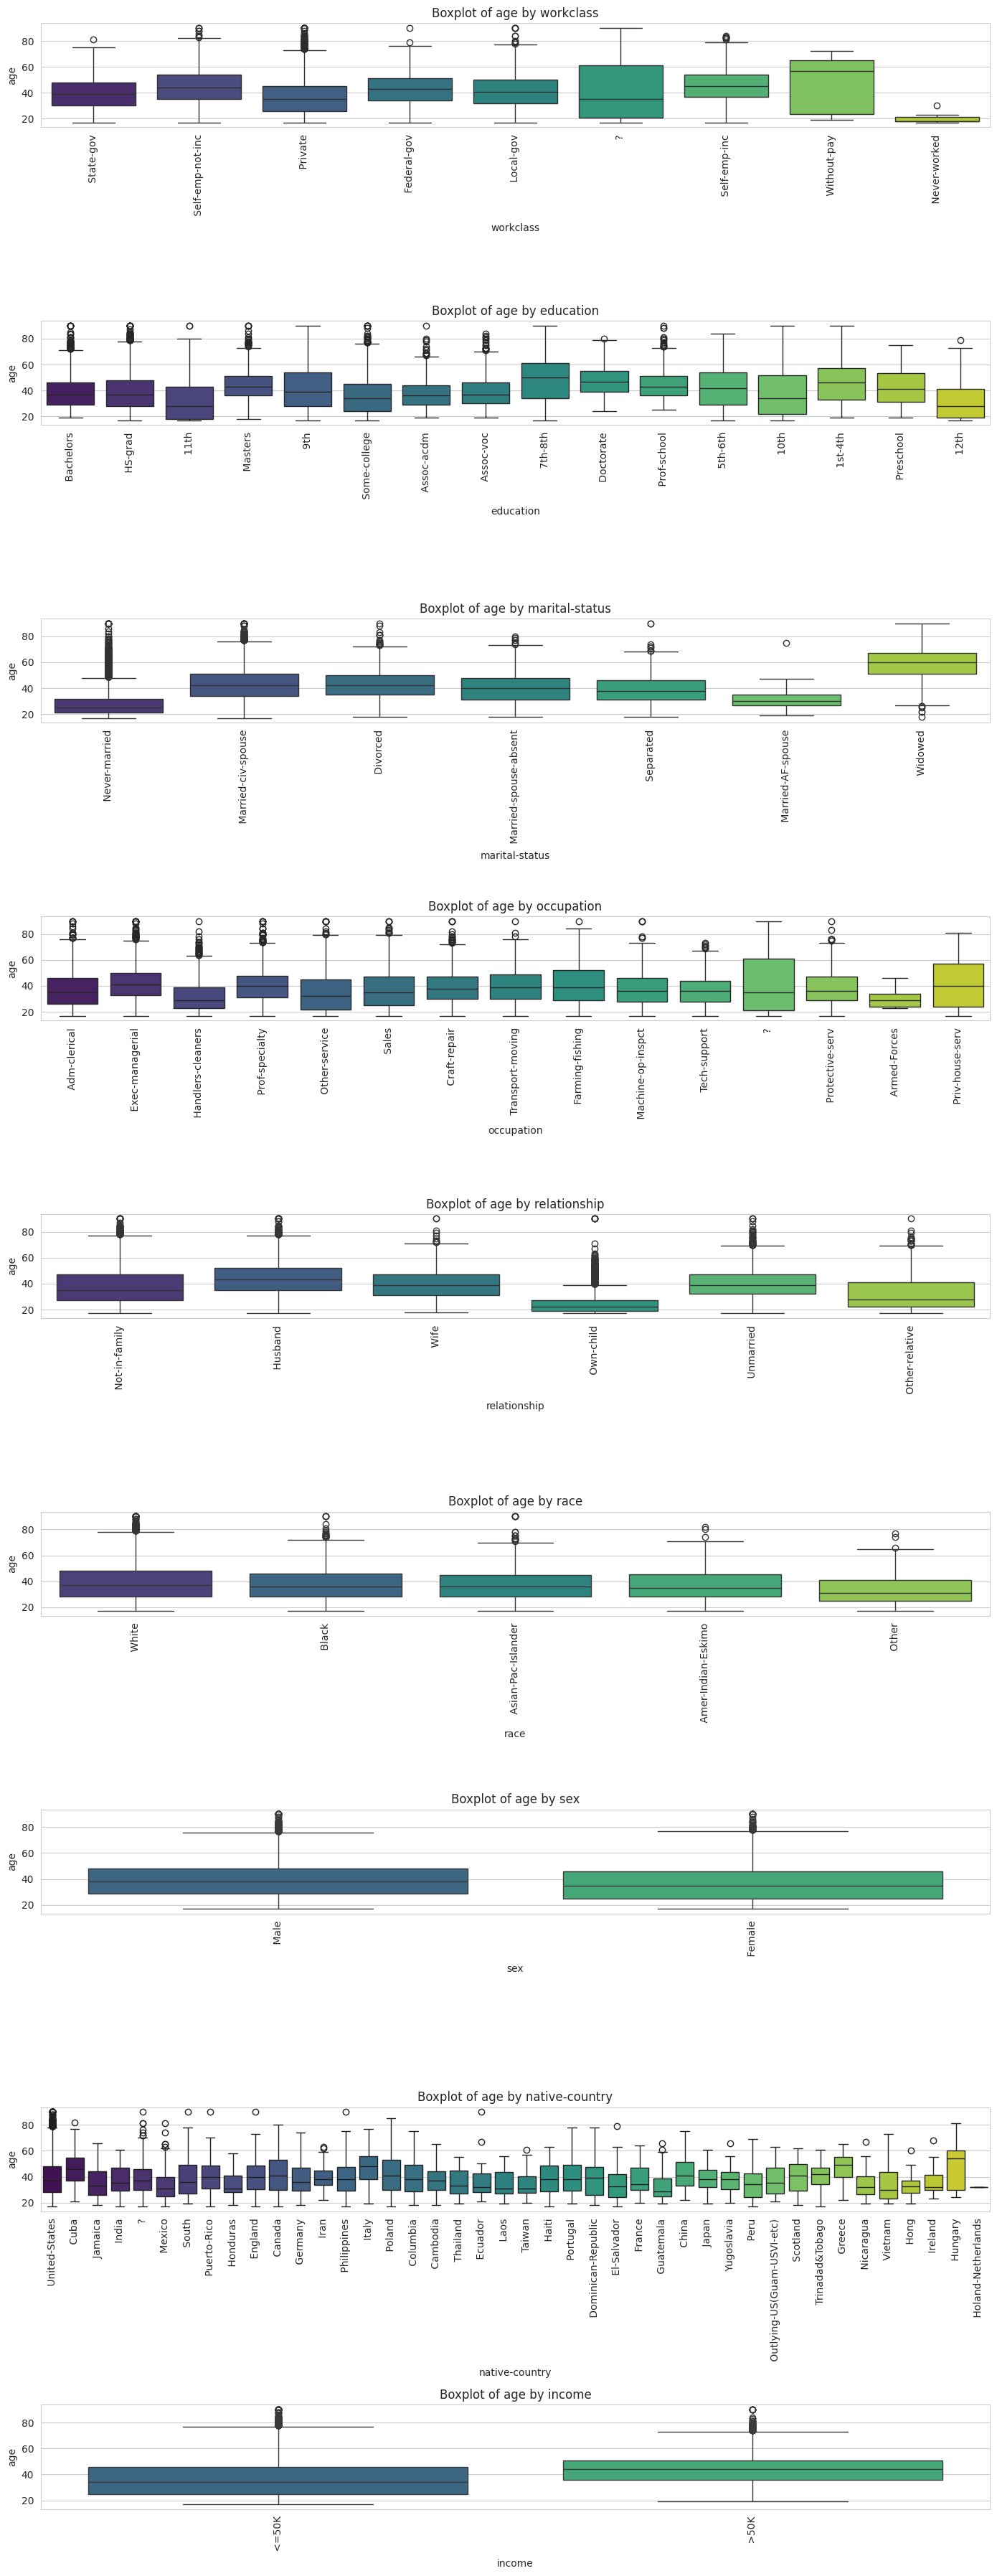

In [43]:
# Loop through each categorical variable and create a boxplot for a selected numerical variable
# For demonstration, we'll choose one numerical variable (e.g., 'age')
selected_numerical = "age"

num_plots = len(categorical_columns)
plt.figure(figsize=(14, 4 * num_plots))
for idx, cat in enumerate(categorical_columns):
    plt.subplot(num_plots, 1, idx + 1)
    sns.boxplot(x=df[cat], y=df[selected_numerical], hue=df[cat], palette="viridis")
    plt.title(f"Boxplot of {selected_numerical} by {cat}")
    plt.xlabel(cat)
    plt.ylabel(selected_numerical)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Stacked Bar Charts for Categorical Variables

##### What We Are Doing
We will create stacked bar charts to visualise the joint distribution of two categorical variables. This visualization displays how the counts of one categorical variable are distributed within the levels of another categorical variable.

##### Why We Are Doing This
Stacked bar charts are valuable because they:
- Reveal the composition of categories within another categorical variable.
- Help identify any imbalance or patterns in categorical relationships.
- Complement frequency counts by adding an extra dimension of categorical comparison.


income            <=50K  >50K
workclass                    
?                  1645   191
Federal-gov         589   371
Local-gov          1476   617
Never-worked          7     0
Private           17733  4963
Self-emp-inc        494   622
Self-emp-not-inc   1817   724
State-gov           945   353
Without-pay          14     0


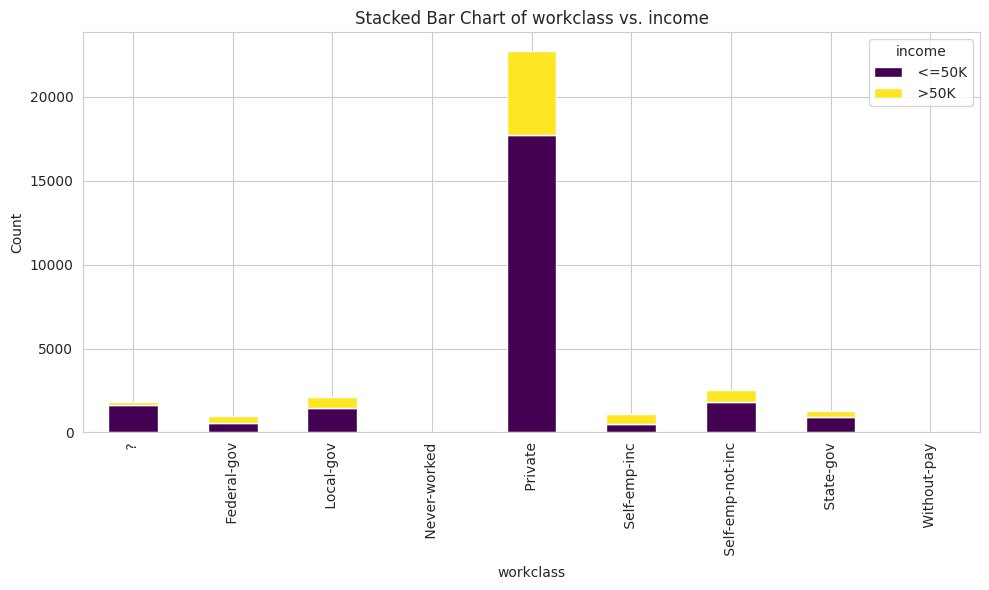

In [44]:
# For demonstration, we'll create a stacked bar chart for a selected pair of categorical variables.
# You can modify these selections as needed.
cat_var1 = 'workclass'
cat_var2 = 'income'

# Create a cross-tabulation of the two variables
crosstab = pd.crosstab(df[cat_var1], df[cat_var2])
print(crosstab)

# Plot a stacked bar chart using the crosstab data
crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title(f"Stacked Bar Chart of {cat_var1} vs. {cat_var2}")
plt.xlabel(cat_var1)
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title=cat_var2)
plt.tight_layout()
plt.show()

### Heatmaps for Categorical vs. Categorical Variables

#### What We Are Doing
We will create heatmaps to visualise the frequency of combinations of two categorical variables. This will allow us to see how often different category pairs occur.

#### Why We Are Doing This
Heatmaps are useful for:
- Highlighting relationships or patterns between two categorical variables.
- Providing a visual overview of the joint distribution across category combinations.
- Identifying potential associations or imbalances that may warrant further investigation.


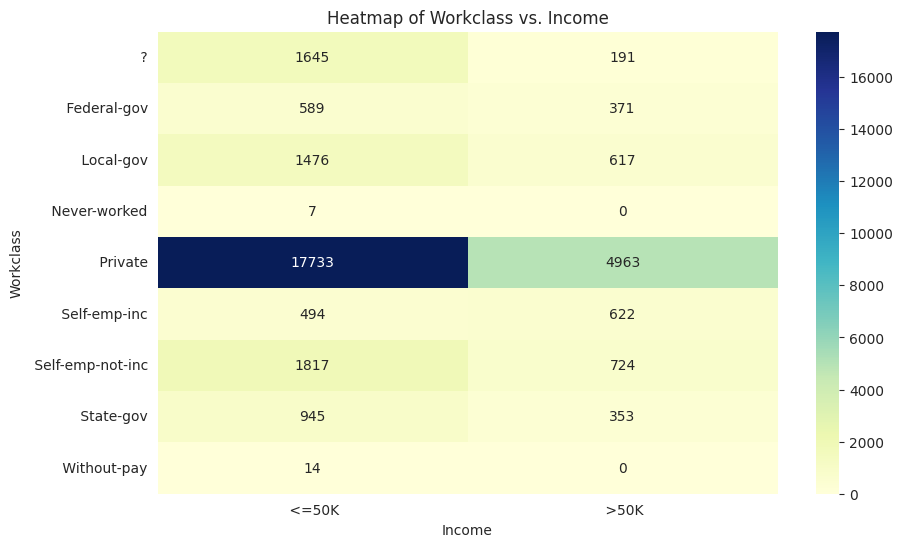

In [46]:
# Create a cross-tabulation of two categorical variables
crosstab = pd.crosstab(df['workclass'], df['income'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt="d")
plt.title("Heatmap of Workclass vs. Income")
plt.xlabel("Income")
plt.ylabel("Workclass")
plt.show()


### 3.5 Correlation Analysis

#### What We Are Doing
In this section, we will calculate and visualise the correlation between numerical variables. We will:
- Compute correlation coefficients (e.g., Pearson’s r) to quantify the strength and direction of relationships.
- Visualise the correlation matrix using a heatmap for an overview of how variables are interrelated.

#### Why We Are Doing This
Correlation analysis helps us:
- **Quantify Relationships:** Determine the strength and direction (positive or negative) of the linear association between variables.
- **Inform Further Analysis:** Identify strongly correlated variables, which can inform feature selection or highlight potential multicollinearity.
- **Visual Overview:** Use a heatmap to quickly spot patterns, trends, and relationships across multiple variables.


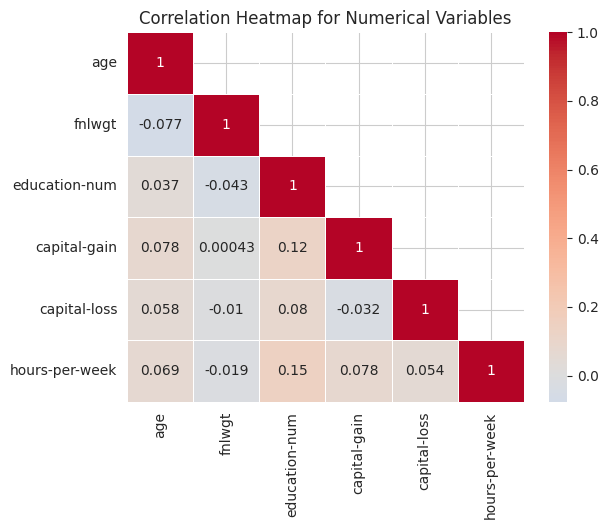

In [ ]:
# Calculate the correlation matrix for numerical variables
correlation_matrix = df[numerical_columns].corr(method='pearson')

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    mask=mask,
    linewidths=0.7,
    center=0,
)
plt.title("Correlation Heatmap for Numerical Variables")
plt.show()

## 4. Multivariate Analysis

### What We Are Doing
In this section, we explore relationships involving three or more variables simultaneously. Examples include:
- **3D Scatter Plots:** Visualize relationships between three numerical variables.
- **Group-wise Summary:** Compute summary statistics across groups to understand variable interactions.

### Why We Are Doing This
Multivariate analysis deepens our understanding of the dataset by:
- **Revealing Complex Interactions:** Showing how multiple variables interact and influence each other.
- **Informing Feature Engineering:** Identifying groups and clusters that can guide model building.
- **Enhancing Data Insights:** Offering a more comprehensive view of the data structure and underlying patterns.

#### 3D Scatter Plots

##### What We Are Doing
We will create 3D scatter plots to visualise the relationships among three numerical variables. This adds an extra dimension to our analysis, making it easier to detect clusters or trends that are not apparent in 2D plots.

##### Why We Are Doing This
3D scatter plots help us:
- Visualise interactions among three variables simultaneously.
- Identify clusters, outliers, or trends that might be hidden in two-dimensional views.
- Enhance our understanding of the data’s multi-dimensional structure.

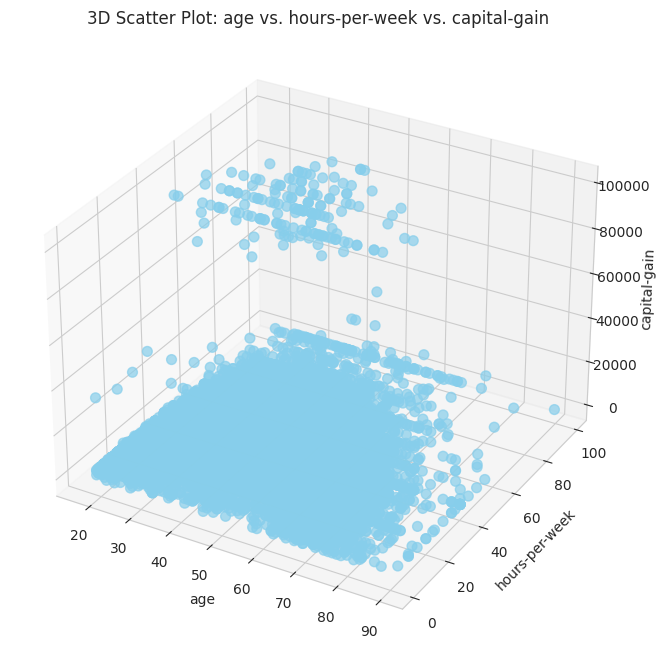

In [57]:
# Select three numerical variables for the 3D scatter plot
x_var = 'age'
y_var = 'hours-per-week'
z_var = 'capital-gain'  # Example variable; adjust as needed

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(df[x_var], df[y_var], df[z_var], c='skyblue', s=50, alpha=0.7)
ax.set_xlabel(x_var)
ax.set_ylabel(y_var)
ax.set_zlabel(z_var)
ax.set_title(f"3D Scatter Plot: {x_var} vs. {y_var} vs. {z_var}")

plt.show()


#### Group-wise Summary

##### What We Are Doing
We will compute summary statistics for numerical variables grouped by a categorical variable. This analysis reveals how different groups compare in terms of central tendency, dispersion, and other measures.

##### Why We Are Doing This
Group-wise summaries help us:
- Understand the differences between groups.
- Identify trends or patterns that vary across categories.
- Provide insights that can inform further analysis or feature engineering.

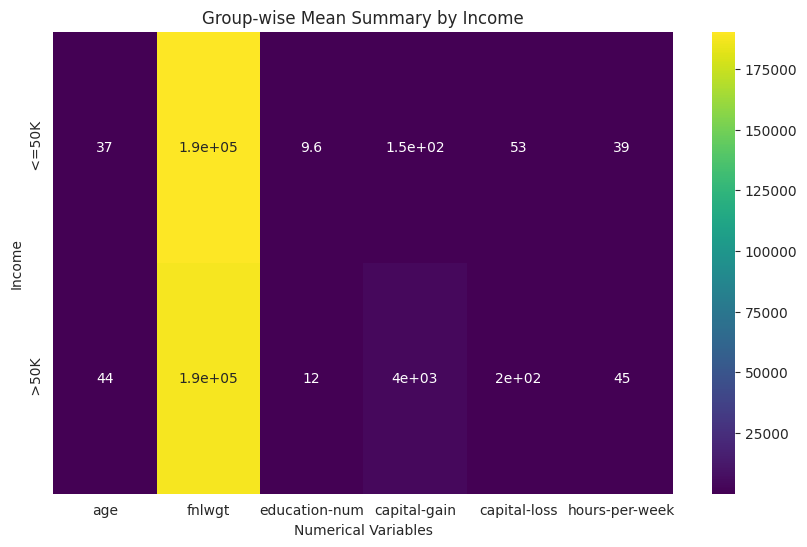

In [59]:
# Example: Compute group-wise means for numerical variables based on a categorical variable (e.g., income)
grouped_summary = df.groupby('income')[numerical_columns].mean()
# print("Group-wise Summary (Mean) by Income:\n", grouped_summary)

# Optionally, display the summary as a heatmap for better visualization
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_summary, annot=True, cmap='viridis')
plt.title("Group-wise Mean Summary by Income")
plt.xlabel("Numerical Variables")
plt.ylabel("Income")
plt.show()